In [382]:
from sympy import *
from sympy.abc import i
import sympy.stats as st
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Bernoulli

In [349]:
x, ρ,ρ_0, N = symbols('x ρ ρ_0 N', positive=True)
sample = symarray('x',N.subs(N,20))

x = st.Bernoulli('x',ρ_0)
L_n = ρ**x*(1-ρ)**(1-x)
logL_n = log(L_n)
logL_n

log(ρ**x*(1 - ρ)**(1 - x))

In [352]:
score_n = diff(logL_n,ρ).simplify()
score_n

(ρ - x)/(ρ*(ρ - 1))

In [363]:
diff(score_n,ρ).simplify()

(-ρ**2 + 2*ρ*x - x)/(ρ**2*(ρ**2 - 2*ρ + 1))

In [361]:
st.E(diff(score_n,ρ).subs(ρ,ρ_0)).simplify()

1/(ρ_0*(ρ_0 - 1))

In [358]:
st.E(x)

ρ_0

In [100]:
hess_n = diff(score_n,ρ).simplify()
-st.E(hess_n).simplify()

-(-ρ**2 + 2*ρ*ρ_0 - ρ_0)/(ρ**2*(ρ**2 - 2*ρ + 1))

In [59]:
st.variance(score_n).simplify()

-1/(ρ*(ρ - 1))

Har funnet størrelse fra $P_{\theta}$. Vil nå utvide til utvalg med N observasjoner. Må håndtere at jeg har N forskjellige X variabler. Kan brute force generere en liste av bernoullis.. kanskje. Vil jobbe med dette som funksjon av symbolsk N, men jobber først med konkret N=10.

In [99]:
st.E(score_n).simplify().subs(ρ,ρ_0)

0

#### utvalg

In [420]:
x = IndexedBase('x') 
i, n,N = symbols('i n N',integer=True)

logL = Sum(x[n]*log(ρ)+(1-x[n])*log(1-ρ),(n,1,N))
logL

Sum((1 - x[n])*log(1 - ρ) + log(ρ)*x[n], (n, 1, N))

In [379]:
score = diff(logL,ρ).together().factor()
score

-Sum(-ρ + x[n], (n, 1, N))/(ρ*(ρ - 1))

In [380]:
score.cancel()

(ρ*Sum(1, (n, 1, N)) - Sum(x[n], (n, 1, N)))/(ρ**2 - ρ)

Kan ha lyst til at x'ene i ligningen er RandomSymbol slik at jeg kan evaluere størrelser som E, V, .. dette er ting som jeg i prinsippet kan regne ut selv dersom jeg kjenner pmf/pdf, men likevel.

Har Sum(expr, (i,a,b)) som er greit gitt at jeg vil summe en gitt expression

In [340]:
x = IndexedBase('x')
n,N = symbols('n N',integer=True)



sample = Sum(x[i],(i,1,N))
x = st.rv.RandomIndexedSymbol(x[n],st.Bernoulli('x',ρ).pspace)

In [341]:
type(x)

sympy.stats.rv.RandomIndexedSymbol

In [320]:
sample

Sum(x[i], (i, 1, N))

In [343]:
logL = Sum(log(ρ**x*(1-ρ)**(1-x)),(n,1,N))
logL

Sum(log(ρ**x[n]*(1 - ρ)**(1 - x[n])), (n, 1, N))

Text(0.5, 0, '$\\rho$')

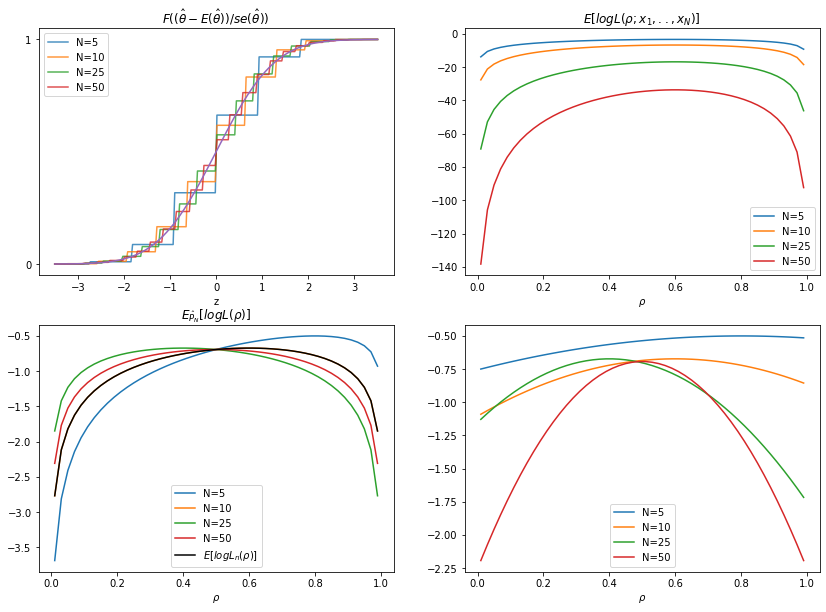

In [490]:
ρ_0 = 0.6 # sann parameter


grid = np.linspace(-3.5, 3.5, num=200)

fig, axes = plt.subplots(2,2,figsize=(14, 10))
(ax0,ax1,ax2,ax3) = axes.flatten()
N = 5, 10,25,50 # størrelse på utvalg

    
with sns.color_palette("muted"):
    for i in range(4):
        n = N[i]
        grid_binom = n*ρ_0+(grid)*np.sqrt(n*ρ_0*(1-ρ_0))
        cdf_binom = stats.binom(n=n,p=ρ_0).cdf(grid_binom)
        ax0.plot(grid,cdf_binom,label=f'N={n}',alpha=.8)
    ax0.plot(grid, stats.norm().cdf(grid))
    ax0.legend()
    ax0.set_yticks([0,1])
    ax0.title.set_text(r'$F((\hat{\theta}-E(\hat{\theta}))/se(\hat{\theta}))$')
    ax0.set_xlabel('z')

ρ_grid = np.linspace(.01,.99)
E_logL_n = ρ_0*np.log(ρ_grid)+(1-ρ_0)*np.log(1-ρ_grid)

for i in range(4):
    n = N[i]
    E_logL = n*E_logL_n
    ax1.plot(ρ_grid,E_logL,label=f'N={n}')
ax1.legend()
ax1.title.set_text(r'$E[logL(\rho;x_1,..,x_N)]$')
ax1.set_xlabel(r'$\rho$')

for i in range(4):
    n = N[i]
    x = stats.bernoulli(ρ_0).rvs(n)
    emp_logL = (1/n)*sum([x[i]*np.log(ρ_grid)+(1-x[i])*np.log(1-ρ_grid) for i in range(n)])
    ρ_hat = sum(x)/n
    hess = n*ρ_hat*(1-ρ_hat)
    approx_logL = sum([x[i]*np.log(ρ_hat)+(1-x[i])*np.log(1-ρ_hat) for i in range(n)])
    approx_logL = (1/n)*approx_logL-0.5*hess*(ρ_hat-ρ_grid)**2 
    ax2.plot(ρ_grid,emp_logL,label=f'N={n}')
    ax3.plot(ρ_grid, approx_logL,label=f'N={n}')
ax2.plot(ρ_grid,E_logL_n,label=r'$E[logL_n(\rho)]$',color='black')
ax2.legend()
ax2.set_xlabel(r'$\rho$')
ax2.title.set_text(r'$E_{\hat{P}_N}[logL(\rho)]$')

ax3.legend()
ax3.set_xlabel(r'$\rho$')